#### For Assignment 3, I have performed a composite of the North Atlantic Oscillation (NAO) Climate Index with my Northeast U.S. precipitation dataset. Due to the differences in time coordinate between the two arrays (i.e. my dataset shows time coordinates of 12-31-1989T18:00:00), I have grouped both arrays by year in order for the composite to work properly, and organized them on the time scale of 1989-2010. For the NAO index, I have defined the positive and negative values as Positive NAO and Negative NAO phases subsequently, and then performed a composite for precipitation anomalies that occur in the Northeast U.S. during each of these phases.

In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
path='/home/pdirmeye/classes/clim680_2022/CLIM_INDICES/'
file='nao.data'
index_name='nao'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-99.9','-99.90'])
df.drop(df.tail(3).index,inplace=True)

In [3]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'
print(start_date)

1948-1-01


In [4]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=876, freq='MS')

In [5]:
clim_index=df.T.unstack().values
clim_index=clim_index.astype('float32')

In [6]:
ds_index=xr.DataArray(clim_index, coords={'time':dates}, dims=['time'])        
ds_index=ds_index.to_dataset(name='nao')
ds_index

<xarray.Dataset>
Dimensions:  (time: 876)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Data variables:
    nao      (time) float32 nan nan nan nan nan nan ... 0.03 1.11 nan nan nan

In [7]:
ds_index_g = ds_index.groupby('time.year').mean()
ds_index_g

<xarray.Dataset>
Dimensions:  (year: 73)
Coordinates:
  * year     (year) int64 1948 1949 1950 1951 1952 ... 2016 2017 2018 2019 2020
Data variables:
    nao      (year) float32 nan nan -0.1583 -0.07 ... 1.093 -0.3933 0.1344

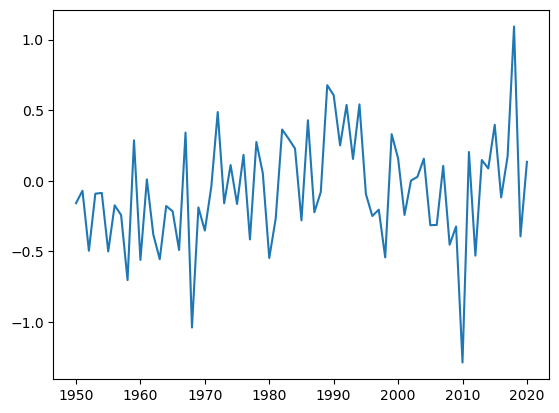

In [8]:
plt.plot(ds_index_g['year'], ds_index_g['nao'])

Positive NAO:  31
Negative NAO:  40
[array(31), array(40)]


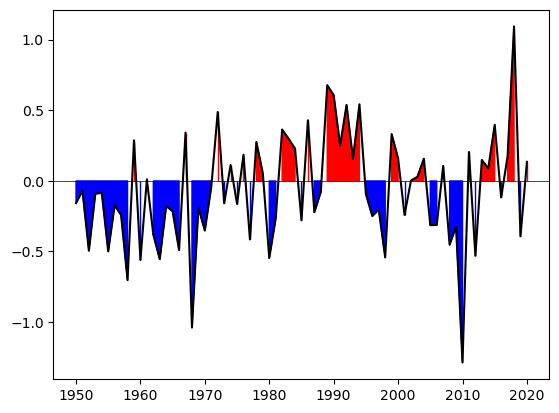

In [9]:
positivenao=ds_index_g['nao'].where(ds_index_g['nao']>0)
negativenao=ds_index_g['nao'].where(ds_index_g['nao']<0)

print('Positive NAO: ',positivenao.count(dim='year').values)
print('Negative NAO: ',negativenao.count(dim='year').values)

counts=[positivenao.count(dim='year').values, 
        negativenao.count(dim='year').values]
print(counts)

plt.plot(ds_index_g['year'],ds_index_g['nao'],color='k')
plt.fill_between(ds_index_g['year'].values,positivenao,y2=0.001,color='red')
plt.fill_between(ds_index_g['year'].values,negativenao,y2=-0.001,color='blue')
plt.axhline(0,color='black',linewidth=0.5)

In [10]:
file='/home/jstiles4/clim680_dataset/ERA5_Reanalysis_Precip_dataset.grib'
ds_tp=xr.open_dataset(file)
ds_tp

<xarray.Dataset>
Dimensions:     (time: 252, latitude: 41, longitude: 53)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1989-12-31T18:00:00 ... 2010-11-30T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 48.0 47.75 47.5 47.25 ... 38.5 38.25 38.0
  * longitude   (longitude) float64 -80.0 -79.75 -79.5 ... -67.5 -67.25 -67.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    tp          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-11-03T08:00 GRIB to CDM+CF via cfgrib-0.9.1...

In [11]:
ds_tp_g = ds_tp*1000
ds_tp_g

<xarray.Dataset>
Dimensions:     (time: 252, latitude: 41, longitude: 53)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1989-12-31T18:00:00 ... 2010-11-30T18:0...
    step        timedelta64[ns] 12:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 48.0 47.75 47.5 47.25 ... 38.5 38.25 38.0
  * longitude   (longitude) float64 -80.0 -79.75 -79.5 ... -67.5 -67.25 -67.0
    valid_time  (time) datetime64[ns] 1990-01-01T06:00:00 ... 2010-12-01T06:0...
Data variables:
    tp          (time, latitude, longitude) float32 2.224 2.3 ... 8.945 9.422
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-11-03T08:00 GRIB to CDM+CF via cfgrib-0.9.1...

In [12]:
dg_tp = ds_tp_g.groupby('time.year').mean()
dg_tp

<xarray.Dataset>
Dimensions:    (latitude: 41, longitude: 53, year: 22)
Coordinates:
    number     int64 0
    step       timedelta64[ns] 12:00:00
    surface    float64 0.0
  * latitude   (latitude) float64 48.0 47.75 47.5 47.25 ... 38.5 38.25 38.0
  * longitude  (longitude) float64 -80.0 -79.75 -79.5 ... -67.5 -67.25 -67.0
  * year       (year) int64 1989 1990 1991 1992 1993 ... 2007 2008 2009 2010
Data variables:
    tp         (year, latitude, longitude) float32 2.224 2.3 ... 6.001 6.017

In [13]:
dg_index = ds_index_g.nao.sel(year=slice(dg_tp['year'][0],dg_tp['year'][-1]))
dg_tp_g = dg_tp.tp.sel(year=slice(dg_index['year'][0],dg_index['year'][-1]))

da_climo = dg_tp_g.mean()
da_anoms = dg_tp_g-da_climo
da_anoms

<xarray.DataArray 'tp' (year: 22, latitude: 41, longitude: 53)>
array([[[-1.0942705e+00, -1.0179765e+00, -9.1688704e-01, ...,
         -6.6209555e-02,  6.2696934e-03,  1.6934800e-01],
        [-1.1410005e+00, -1.0380037e+00, -9.3691421e-01, ...,
          4.1555643e-02,  7.9702616e-02, -2.4247885e-02],
        [-1.0465868e+00, -9.5026565e-01, -8.8350844e-01, ...,
          1.9795823e-01,  1.9795823e-01,  9.3054056e-02],
        ...,
        [ 1.1935942e+00,  6.6621232e-01,  9.4961405e-02, ...,
          2.0061247e+00,  2.1434538e+00,  2.2159331e+00],
        [ 6.7765641e-01,  4.0299821e-01,  1.2929368e-01, ...,
          2.3828261e+00,  2.4820082e+00,  2.5993102e+00],
        [ 3.8297105e-01,  3.8392472e-01,  3.4673142e-01, ...,
          2.6994460e+00,  2.7948134e+00,  3.0723326e+00]],

       [[-7.1788692e-01, -6.8085265e-01, -6.4699721e-01, ...,
          4.9820900e-02,  2.6853085e-02,  1.5408993e-02],
        [-7.6676273e-01, -7.3115897e-01, -6.9730353e-01, ...,
          1.7872810e-02, -7.3123693e-02, -1.6292810e-01],
        [-7.6207399e-01, -7.3076153e-01, -6.7107749e-01, ...,
          1.3899088e-02, -1.0554862e-01, -1.9575024e-01],
...
        [ 7.9511714e-01,  4.5974183e-01,  1.0513401e-01, ...,
          3.5653026e+00,  3.4549148e+00,  3.2819822e+00],
        [ 6.4666200e-01,  3.5483766e-01,  2.2402763e-02, ...,
          4.1121559e+00,  3.9156988e+00,  3.7481697e+00],
        [ 3.4641361e-01,  6.9530010e-02, -8.6712837e-03, ...,
          4.7604952e+00,  4.5683298e+00,  4.3755283e+00]],

       [[-9.8745894e-01, -9.5486069e-01, -8.7180424e-01, ...,
          2.9254532e-01,  2.2821569e-01,  1.5625668e-01],
        [-1.0845604e+00, -1.0183234e+00, -9.3457341e-01, ...,
          1.4689326e-01,  5.8288336e-02,  2.0074844e-04],
        [-1.1012063e+00, -1.0358362e+00, -9.7462773e-01, ...,
          2.2222042e-02, -6.0314178e-02, -1.1840153e-01],
        ...,
        [ 2.4035335e-01, -2.0259857e-02, -2.5243616e-01, ...,
          2.2111647e+00,  2.1102488e+00,  2.1496093e+00],
        [ 6.3316822e-02, -1.6417789e-01, -3.7606692e-01, ...,
          2.4449017e+00,  2.3611515e+00,  2.3862941e+00],
        [-2.8382063e-01, -4.9779058e-01, -5.2917504e-01, ...,
          2.7814620e+00,  2.6826265e+00,  2.6987522e+00]]], dtype=float32)
Coordinates:
    number     int64 0
    step       timedelta64[ns] 12:00:00
    surface    float64 0.0
  * latitude   (latitude) float64 48.0 47.75 47.5 47.25 ... 38.5 38.25 38.0
  * longitude  (longitude) float64 -80.0 -79.75 -79.5 ... -67.5 -67.25 -67.0
  * year       (year) int64 1989 1990 1991 1992 1993 ... 2007 2008 2009 2010

In [14]:
positivenao_g = positivenao.sel(year=slice(dg_tp['year'][0],dg_tp['year'][-1]))
negativenao_g = negativenao.sel(year=slice(dg_tp['year'][0],dg_tp['year'][-1]))
positivenao_g

<xarray.DataArray 'nao' (year: 22)>
array([0.6775    , 0.6066666 , 0.25083333, 0.53749996, 0.155     ,
       0.5416667 ,        nan,        nan,        nan,        nan,
       0.33083335, 0.15916666,        nan, 0.00166667, 0.02833333,
       0.15666665,        nan,        nan, 0.10583333,        nan,
              nan,        nan], dtype=float32)
Coordinates:
  * year     (year) int64 1989 1990 1991 1992 1993 ... 2006 2007 2008 2009 2010

In [15]:
positivenao_tp = da_anoms.sel(year=positivenao_g.dropna(dim='year')['year']).mean(dim='year')
negativenao_tp = da_anoms.sel(year=negativenao_g.dropna(dim='year')['year']).mean(dim='year')

comp_precip = [positivenao_tp,negativenao_tp]
comp_precip

[<xarray.DataArray 'tp' (latitude: 41, longitude: 53)>
 array([[-0.85035497, -0.8089695 , -0.742709  , ..., -0.16008021,
         -0.16065644, -0.13873518],
        [-0.93246365, -0.9046615 , -0.8381229 , ..., -0.14866926,
         -0.1672659 , -0.24786465],
        [-0.93237776, -0.9047807 , -0.85637504, ..., -0.09146208,
         -0.13769537, -0.21873121],
        ...,
        [ 0.74853295,  0.29406077, -0.06954078, ...,  2.0094626 ,
          2.067054  ,  2.144871  ],
        [ 0.3607451 ,  0.00427624, -0.31939682, ...,  2.4278672 ,
          2.4572325 ,  2.5393279 ],
        [-0.11017791, -0.3681667 , -0.39541265, ...,  2.917917  ,
          2.9504938 ,  3.0090191 ]], dtype=float32)
 Coordinates:
     number     int64 0
     step       timedelta64[ns] 12:00:00
     surface    float64 0.0
   * latitude   (latitude) float64 48.0 47.75 47.5 47.25 ... 38.5 38.25 38.0
   * longitude  (longitude) float64 -80.0 -79.75 -79.5 ... -67.5 -67.25 -67.0,
 <xarray.DataArray 'tp' (latitude: 41, lo

/home/jstiles4/.conda/envs/clim_data3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


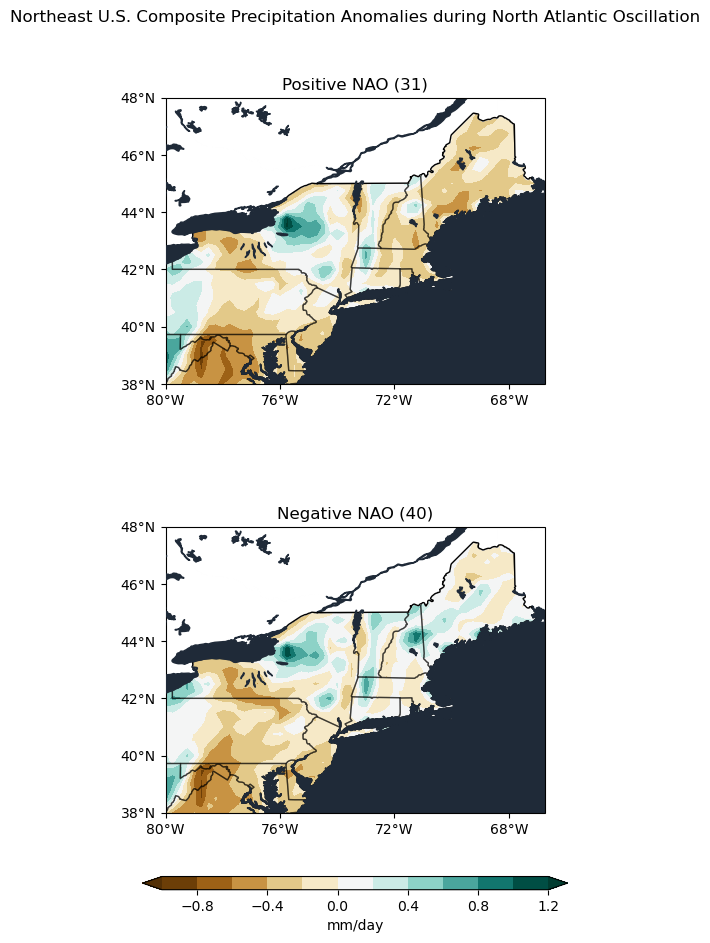

In [16]:
labels=['Positive NAO','Negative NAO']
clevs = np.arange(-1.0,1.4,0.2)

fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-74)},
                        figsize=(8.5,11))

axs = axs.flatten()

for i,tp in enumerate(comp_precip):

        data = comp_precip[i]

        data,lons = add_cyclic_point(data,coord=comp_precip[i]['longitude'])

        cs=axs[i].contourf(lons,comp_precip[i]['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

        axs[i].set_xticks([-80,-76,-72,-68], crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks([38,40,42,44,46,48], crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        axs[i].coastlines()
        axs[i].add_feature(feature.OCEAN, zorder=2, color='#1F2A38')
        axs[i].add_feature(feature.BORDERS, zorder=2, color='k')
        axs[i].add_feature(feature.LAKES, zorder=3, color='#1F2A38')
        axs[i].add_feature(feature.BORDERS.with_scale('10m'),
               linestyle='-', alpha=.5)
        axs[i].add_feature(feature.STATES.with_scale('10m'),
               linestyle='-', alpha=.5)
        
        fname='/home/jstiles4/gadm41_CAN_1.shp'
        shape_feature = ShapelyFeature(Reader(fname).geometries(),
                               ccrs.PlateCarree(), edgecolor='black', color='white')
        
        axs[i].add_feature(shape_feature)
        
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')

plt.suptitle('Northeast U.S. Composite Precipitation Anomalies during North Atlantic Oscillation') ;

In [17]:
diff_precip=[positivenao_tp-negativenao_tp, negativenao_tp-positivenao_tp]

In [18]:
p = 0.05

In [19]:
from scipy.stats import ttest_ind

positivenao_precip_vals = da_anoms.sel(year=positivenao_g.dropna(dim='year')['year'])
negativenao_precip_vals = da_anoms.sel(year=negativenao_g.dropna(dim='year')['year'])

In [20]:
tstat,pval = ttest_ind(positivenao_precip_vals, 
                negativenao_precip_vals, 
                equal_var = False)

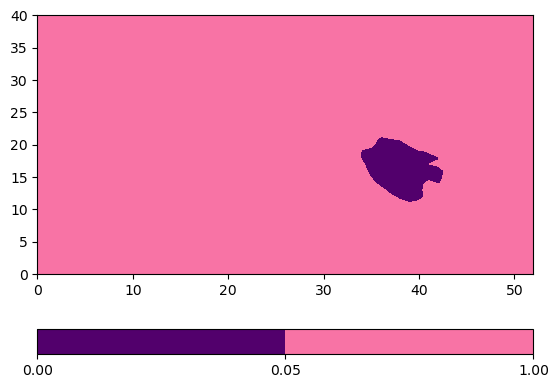

In [21]:
plt.contourf(pval,[0,0.05,1],cmap='RdPu_r') 
plt.colorbar(orientation='horizontal') ;

In [22]:
mask_diff = diff_precip[0].where(pval <= p)
mask_diff

<xarray.DataArray 'tp' (latitude: 41, longitude: 53)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    number     int64 0
    step       timedelta64[ns] 12:00:00
    surface    float64 0.0
  * latitude   (latitude) float64 48.0 47.75 47.5 47.25 ... 38.5 38.25 38.0
  * longitude  (longitude) float64 -80.0 -79.75 -79.5 ... -67.5 -67.25 -67.0

Text(0.5, 0.98, 'Northeast U.S. Composite Precipitation Differences during North Atlantic Oscillation')

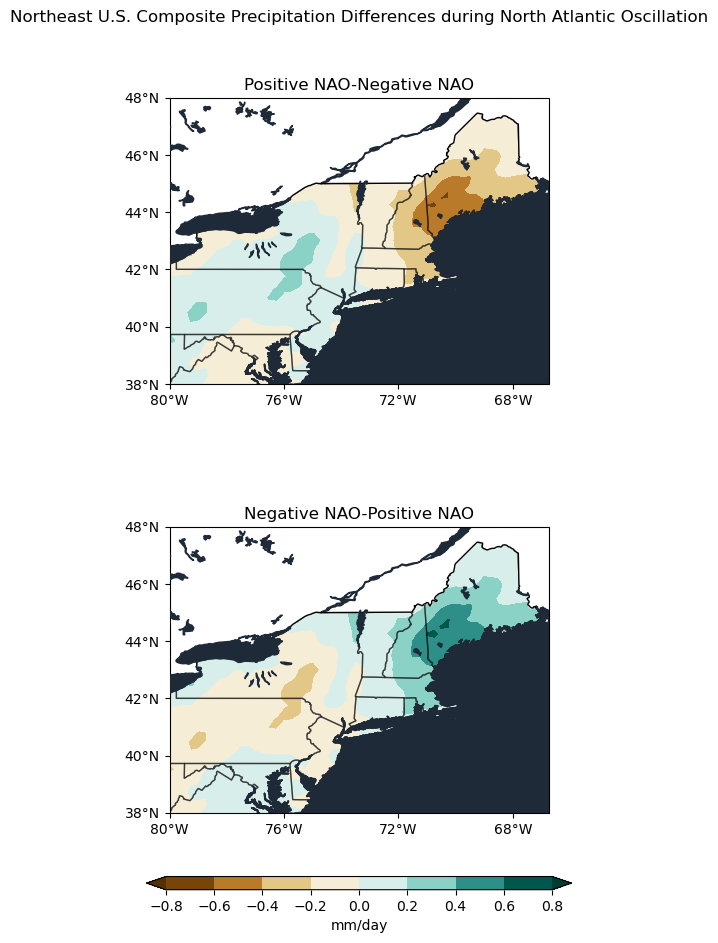

In [24]:
labels=['Positive NAO-Negative NAO','Negative NAO-Positive NAO']
clevs=np.arange(-0.8,0.9,0.2)

fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

axs = axs.flatten()

for i,enso in enumerate(diff_precip):

        data = diff_precip[i]

        data,lons = add_cyclic_point(data,coord=diff_precip[i]['longitude'])

        cs = axs[i].contourf(lons,diff_precip[i]['latitude'],data,clevs,
                          transform=ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

        axs[i].set_xticks([-80,-76,-72,-68], crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks([38,40,42,44,46,48], crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        axs[i].set_title(labels[i])
        
        axs[i].coastlines()
        axs[i].add_feature(feature.OCEAN, zorder=2, color='#1F2A38')
        axs[i].add_feature(feature.BORDERS, zorder=2, color='k')
        axs[i].add_feature(feature.LAKES, zorder=3, color='#1F2A38')
        axs[i].add_feature(feature.BORDERS.with_scale('10m'),
               linestyle='-', alpha=.5)
        axs[i].add_feature(feature.STATES.with_scale('10m'),
               linestyle='-', alpha=.5)
        
        fname='/home/jstiles4/gadm41_CAN_1.shp'
        shape_feature = ShapelyFeature(Reader(fname).geometries(),
                               ccrs.PlateCarree(), edgecolor='black', color='white')
        
        axs[i].add_feature(shape_feature)
        
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

cbar = fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

plt.suptitle('Northeast U.S. Composite Precipitation Differences during North Atlantic Oscillation')

Text(0.5, 0.98, 'Northeast U.S. Composite Precipitation Differences Positive NAO-Negative NAO')

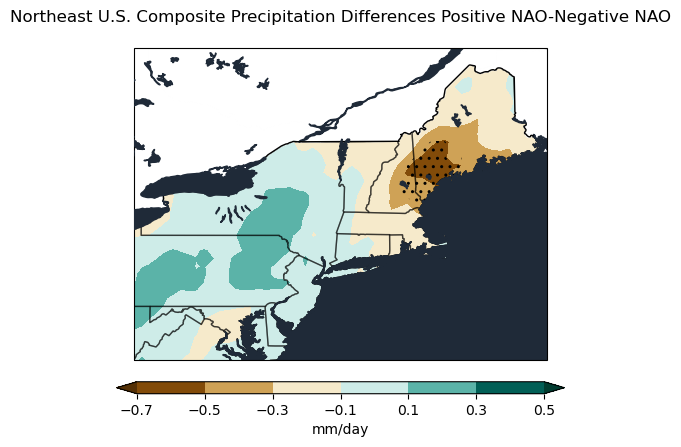

In [25]:
labels=['Positive NAO vs. Negative NAO']
clevs=np.arange(-0.7,0.7,0.2)
hatch_levs=[0]

fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-74)})


data=diff_precip[0]

data,lons=add_cyclic_point(data,coord=diff_precip[0]['longitude'])
mask_data,lons=add_cyclic_point(mask_diff,coord=diff_precip[0]['longitude'])

cs=axs.contourf(lons,diff_precip[0]['latitude'],data,clevs,
                transform = ccrs.PlateCarree(),
                cmap='BrBG',extend='both')

ss=axs.contourf(lons,diff_precip[0]['latitude'],mask_data,[0,1],
                transform = ccrs.PlateCarree(),colors=['None'],
                hatches=['..',''],extend='both',alpha=0.0)

axs.coastlines()
axs.add_feature(feature.OCEAN, zorder=2, color='#1F2A38')
axs.add_feature(feature.BORDERS, zorder=2, color='k')
axs.add_feature(feature.LAKES, zorder=3, color='#1F2A38')
axs.add_feature(feature.BORDERS.with_scale('10m'),
               linestyle='-', alpha=.5)
axs.add_feature(feature.STATES.with_scale('10m'),
               linestyle='-', alpha=.5)
        
fname='/home/jstiles4/gadm41_CAN_1.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                               ccrs.PlateCarree(), edgecolor='black', color='white')
        
axs.add_feature(shape_feature)
        
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

cbar_ax = fig.add_axes([0.15, 0.18, 0.7, 0.025])

cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')

plt.suptitle('Northeast U.S. Composite Precipitation Differences Positive NAO-Negative NAO')